This notebook is part of the [Machine Learning class](https://github.com/erachelson/MLclass) by [Emmanuel Rachelson](https://personnel.isae-supaero.fr/emmanuel-rachelson?lang=en).

License: CC-BY-SA-NC.

<div style="font-size:22pt; line-height:25pt; font-weight:bold; text-align:center;">Bagging</div>

1. [The bootstrap (statistics)](#sec1)
2. [Bootstraping in Machine Learning](#sec2)
3. [Why does Bagging work?](#sec3)
4. [Bagging in practice](#sec4)

The general intuition:

Trees are a higly variable predictor: slight changes in input data $\Rightarrow$ huge changes in prediction.

It seems rather like a weakness, let's use that as a strength.

# <a id="sec1"></a> 1. The bootstrap (statistics)

Bootstrapping: a general non-parametric method in Statistics to estimate prediction variance.

**The formal problem:**

Suppose a set of examples $\mathbf{x}$ of size $n$, where each component has been drawn from the same distribution $P_X$.<br>
Suppose one wants to evaluate a statistic $\theta$ of the random variable $X$, with an estimator $\widehat{\theta}$ over $\mathbf{x}$.

The estimator's variance across datasets $\mathbf{x}$ of size $n$ is $Var(\hat{\theta}) = \mathbb{E}_{\mathbf{x}} \left( \hat{\theta}^2 - \mathbb{E}\left(\hat{\theta}\right)^2 \right)$.

We would like to estimate $\widehat{\theta}$'s distribution $P_{\hat{\theta}}$ over all possible training sets, in order (among other things) to assess if $\widehat{\theta}$ has a large estimation variance.

This will inform us on the reliability of our estimate of $\mathbb{E}(\hat{\theta})$ (over all possible training sets).

To estimate this distribution $P_{\hat{\theta}}$, we need to have examples of various training sets of all possible sizes, which means one needs more data points in $\mathbf{x}$, but such points are not available: we have $\mathbf{x}$ and that's all.

**Proposed solution:**

- Simulate the distribution that generated $\mathbf{x}$ by drawing $n$ samples from $\mathbf{x}$ with replacement.
- Evaluate $\widehat{\theta}$ on this new sample set of size $n$.
- Repeat many times.
- Approximately estimate $P_{\hat{\theta}}$ via the distribution $\hat{P}_{\hat{\theta}}$ of the results.
- (To estimate $\mathbb{E}(\hat{\theta})$, compute the empirical average of the results.)

**The algorithm:**

For $b=1$ to $B$
1. Bootstrap sample: obtain $\mathbf{x}^b$ by sampling from $\mathbf{x}$ with replacement.
2. Compute $\hat{\theta}^b$ from $\mathbf{x}^b$

Estimate the distribution of $\hat{\theta}^b$.

(Compute empirical average $\hat{\theta} = \frac{1}{B} \sum\limits_{b=1}^B \hat{\theta}^b$)

**Origin of the "bootstrap" name:**
- Popular saying: to pull oneself up by one's own bootstraps.
- Münchhausen (Rudolf E. Raspe)<br> pulls himself out of a mire by his own hair.
- $[$French$]$ Méthode de Cyrano (E. Rostand)<br> Flies to the moon by 7 different ways, including throwing a magnet upwards.
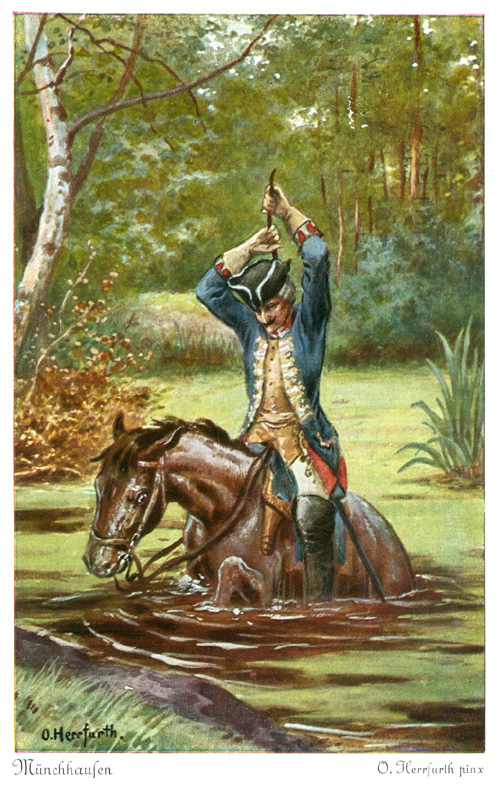

**Formally**

Let $\hat{P}_X$ be the *empirical distribution* of the $X$ variable (from the data $\mathbf{x}$), and $\hat{F}_X$ its *empirical cumulative distribution function*.

As $n\rightarrow \infty$, $\hat{F}_X$ converges to the true cumulative distribution function $F_X$ of $X$.

We draw from $\hat{F}_X$ to simulate the true $F_X$.

This provides us with $\hat{P}_{\hat{\theta}}$, which we assume to be representative to $P_\hat{\theta}$.

References:<br>
**An Introduction to the Bootstrap.**<br>
B. Efron and R. Tibshirani, *Chapman & Hall/CRC, (1993).

**[What Teachers Should Know About the Bootstrap: Resampling in the Undergraduate Statistics Curriculum](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4784504/)**<br>
T. C. Hesterberg, *The American Statistician*, 69(4), 371–386, (2015).<br>
[arXiv longer version](https://arxiv.org/abs/1411.5279)

Let's practice on an example. In 1878, Simon Newcomb took observations on the speed of light. The data set below (taken from the [Bayesian data analysis book datasets](http://www.stat.columbia.edu/~gelman/book/)) describes the deviations in travel time from $24800$ nanoseconds. This data contains two outliers, which influence the sample mean.

In [1]:
import numpy as np

times = np.array([28, 26, 33, 24, 34, -44, 27, 16, 40, -2, 29,
                  22, 24, 21, 25, 30, 23, 29, 31, 19, 24, 20,
                  36, 32, 36, 28, 25, 21, 28, 29, 37, 25, 28,
                  26, 30, 32, 36, 26, 30, 22, 36, 23, 27, 27,
                  28, 27, 31, 27, 26, 33, 26, 32, 32, 24, 39,
                  28, 24, 25, 32, 25, 29, 27, 28, 29, 16, 23])

print("Number of observations:", times.shape[0])

Number of observations: 66


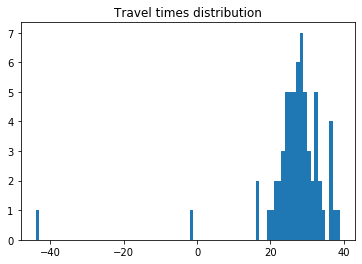

Sample mean: 26.21212121212121
Sample median: 27.0


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(times, bins=np.arange(np.min(times),np.max(times),1));
plt.title("Travel times distribution")
plt.show()
print("Sample mean:", np.mean(times))
print("Sample median:", np.median(times))

<div class="alert alert-warning">**Exercice:**<br>
Implement a Bootstrap algorithm to estimate the distribution of the empirical average and empirical median estimators on this data.<br>
Plot the histogram of these distributions (use [`plt.hist`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)).<br>
Estimate the estimator's empirical average from the bootstrap samples and the mean of its distribution.
</div>

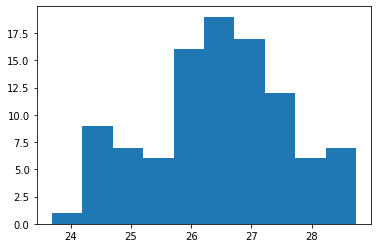

In [5]:
# %load solutions/code1.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

def bootstrap(times, N):
    list_mean = []
    list_median = []
    for i in range(N):
        times_bootstrap = []
        for j in range(len(times)):
            times_bootstrap.append(np.random.choice(times, 1, replace=True)[0])
        list_mean.append(np.mean(times_bootstrap))
        list_median.append(np.median(times_bootstrap))
    plt.hist(list_mean)
#     plt.hist(list_median)

bootstrap(times, 100)

Note that:
- the Bootstrap does not provide better estimates of the statistic than the original estimator,
- however it provides *distribution* estimates (confidence intervals) and thus can help reduce variance.

# <a id="sec2"></a> 2. Bootstraping in Machine Learning

Training set: $\mathcal{T}=\left\{(x_i,y_i)\right\}_{i=1..N}$.<br>
Predictor $\varphi(x)$ trained on $\mathcal{T}$.

Bootstrap replicates of $\mathcal{T}$ to build a better predictor $\varphi_B$?<br>
$\rightarrow$ Idea of Bagging (**B**ootstrap **agg**regat**ing**)

**Bagging in a nutshell:**

For $b=1$ to $B$
1. Take bootstrap replicate $\mathcal{T}^b$ of $\mathcal{T}$
2. Train $\varphi^b$ on $\mathcal{T}^b$

Return $\varphi_B: x\mapsto \arg\max\limits_{j} \sum\limits_{b=1}^B I(\varphi^b(x) = j)$ (majority vote).

In the regression case: $\varphi_B: x\mapsto \frac{1}{B} \sum\limits_{b=1}^B \varphi^b(x)$.

The parallel between Bagging and the Bootstrap:

$$\begin{array}{rcl}
\mathbf{x}=(x_1,\ldots,x_N) & \leftrightarrow & \mathcal{T} = \left\{(x_i,y_i)\right\}_{i=1..N}\\
\mathbf{x}^b=(x^b_1,\ldots,x^b_N) & \leftrightarrow & \mathcal{T}^b =\left\{(x^b_i,y^b_i)\right\}_{i=1..N}\\
\textrm{empirical distribution }\hat{P}_X & \leftrightarrow & \textrm{empirical distribution } \hat{P}_\mathcal{T}\\
\textrm{true distribution }P_X & \leftrightarrow & \textrm{true distribution } P_\mathcal{T}\\
\hat{\theta}^b & \leftrightarrow & \varphi^b\\
\mathbb{E}_{\hat{P}_{\hat{\theta}}}\left(\hat{\theta}\right)=\frac{1}{B}\sum \hat{\theta}^b & \leftrightarrow & \varphi_B\\
\mathbb{E}_{P_{\hat{\theta}}}\left(\hat{\theta}\right) & \leftrightarrow & \varphi_A(\cdot)=\mathbb{E}_{P_\mathcal{T}}\left(\varphi_\mathcal{T}(\cdot)\right)\\
\theta & \leftrightarrow & \mathbb{E}_X(Y|X)
\end{array}$$

The (Bootstrap) key idea:<br>
Since, with enough samples $N$, $\varphi_A(x) = \mathbb{E}_{P_\mathcal{T}}\left(\varphi_\mathcal{T}(x)\right)$ converges to the optimal predictor of $\mathbb{E}_X(Y|X)$, we build the Bootstrap distribution over $\mathcal{T}^b$ to obtain $\varphi_B$ and we use $\varphi_B$ to approximate $\varphi_A$.

# <a id="sec3"></a> 3. Why does Bagging work?

Let:
- $\varphi(\cdot)$ be the base classifier<br>
(generalization error $e$).
- $\varphi_B(\cdot) = \mathbb{E}_{\hat{\mathcal{T}}} \left( \varphi(\cdot) \right)$ be the Bagging estimator built with Bootstrap samples<br>
(generalization error $e_B$).
- $\varphi_A(\cdot) = \mathbb{E}_{\mathcal{T}} \left( \varphi(\cdot) \right)$ be the aggregate estimator averaging over all possible training sets<br>
(generalization error $e_A$).

In practice, we never get $\varphi_A$.

<div class="alert alert-success">**Key results:**<br>
*1st result:* $\varphi_A$ is always at least as good as $\varphi$; $e_A \leq e$<br>
<br>
*2nd result:* The highest the variance of $\varphi$ across training sets $\mathcal{T}$, the more improvement $\varphi_A$ produces.<br>
<br>
*3rd result:* $\varphi_B$ only approximates $\varphi_A$ so $e_A \leq e_B$
</div>

Consequences:
- If $\varphi$ highly variable w.r.t. $\mathcal{T}$, $\varphi_B$ improves on $\varphi$ through aggregation.
- But if $\varphi$ is rather stable w.r.t. $\mathcal{T}$, $e_A\approx e$ and since $\varphi_B$ approximates $\varphi_A$, $e_B$ might be greater than $e$.

For a more rigorous explanation, see the attached document <a href="WhyBaggingWorks.pdf">WhyBaggingWorks.pdf</a>.

**So it does not always work?**

Actually, no, it does not always work.<br>
Bagging should be used to transform highly variable predictors $\varphi$ into a more accurate averaged commitee $\varphi_B$.

Examples of $\varphi$ that Bagging improves:<br>
$\rightarrow$ Trees, Neural Networks.<br>
Examples of $\varphi$ that Bagging does not improve much (or degrades):<br>
$\rightarrow$ Support Vector Machines, Gaussian Processes.

# <a id="sec4"></a> 4. Bagging in practice

Let's study the decision boundary and the generalization error of a Forest of Trees obtained with Bagging.

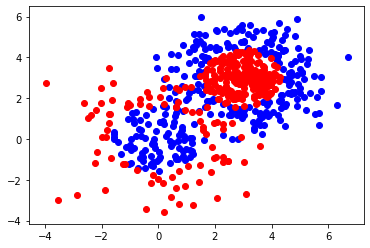

In [6]:
from sklearn import datasets
from sklearn.utils import shuffle

def gen_data(seed):
    X1, y1 = datasets.make_gaussian_quantiles(cov=2.,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=seed)
    X2, y2 = datasets.make_gaussian_quantiles(mean=(3, 3), cov=1.5,
                                 n_samples=700, n_features=2,
                                 n_classes=2, random_state=seed)
    X = np.concatenate((X1, X2))
    y = np.concatenate((y1, - y2 + 1))
    y = 2*y-1
    X, y = shuffle(X, y)
    return X, y

X,y = gen_data(1)
Xtest,X = np.split(X,[400])
ytest,y = np.split(y,[400])

Xblue = X[y==-1]
Xred = X[y==1]
plt.figure()
plt.scatter(Xblue[:,0],Xblue[:,1],c='b')
_=plt.scatter(Xred[:,0],Xred[:,1],c='r')

Let's introduce three utility functions:
- `forest_predict` takes a forest as a list of trees and a vector of inputs, and returns the majority vote of the forest for every input.
- `forest_score` takes a forest, a vector of samples and labels and returns the classification accuracy of the forest.
- `plot_decision_boundary_forest` takes a forest and a set of labeled points and plots the points and the decision boundary.

In [7]:
from sklearn import tree
from sklearn.utils import resample

### Utility functions
def forest_predict(f,X):
    N = len(f)
    votes = np.zeros((X.shape[0],N))
    for i in range(N):
        votes[:,i] = f[i].predict(X)
    return np.sign(np.sum(votes,axis=1))

def forest_score(f,X,y):
    n=len(y)
    return np.sum(np.not_equal(forest_predict(f,X),y))/n

def plot_decision_boundary_forest(f, X, y):
    plot_step = 0.02
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, plot_step), np.arange(x1_min, x1_max, plot_step))
    yypred = forest_predict(f, np.c_[xx0.ravel(),xx1.ravel()])
    yypred = yypred.reshape(xx0.shape)
    plt.contourf(xx0, xx1, yypred, cmap=plt.cm.Paired)
    y_pred = forest_predict(f, X)
    Xblue_good = X[np.equal(y,-1)*np.equal(y,y_pred)]
    Xblue_bad  = X[np.equal(y,-1)*np.not_equal(y,y_pred)]
    Xred_good  = X[np.equal(y,1)*np.equal(y,y_pred)]
    Xred_bad   = X[np.equal(y,1)*np.not_equal(y,y_pred)]
    plt.scatter(Xblue_good[:,0],Xblue_good[:,1],c='b')
    plt.scatter(Xblue_bad[:,0],Xblue_bad[:,1],c='c',marker='v')
    plt.scatter(Xred_good[:,0],Xred_good[:,1],c='r')
    plt.scatter(Xred_bad[:,0],Xred_bad[:,1],c='m',marker='v')
    plt.show()


Let's re-generate some training and testing data.

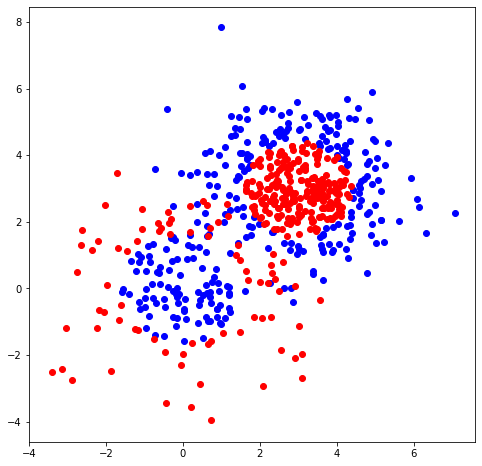

In [8]:
### Generate data
X,y = gen_data(1)
Xtest,X = np.split(X,[400])
ytest,y = np.split(y,[400])

Xblue = X[y==-1]
Xred = X[y==1]
plt.figure(figsize=(8,8))
plt.scatter(Xblue[:,0],Xblue[:,1],c='b')
plt.scatter(Xred[:,0],Xred[:,1],c='r');

<div class="alert alert-warning">**Exercice:**<br>
Implement a Bagging procedure that builds a forest of 101 trees.<br>
Monitor the training and generalization error of individual trees and of the forest, along the forest growth.<br>
Display and comment.
</div>

In [11]:
from sklearn import tree
from sklearn.utils import resample

### Growing the forest
Nbootstrap = 101
forest = list()
tree_training_error = np.zeros(Nbootstrap)
tree_generalization_error = np.zeros(Nbootstrap)
forest_training_error = np.zeros(Nbootstrap)
forest_generalization_error = np.zeros(Nbootstrap)

In [12]:
# %load solutions/code2.py
### WRITE YOUR CODE HERE
# If you get stuck, uncomment the line above to load a correction in this cell (then you can execute this code).

for i in range(Nbootstrap):
    Xb, yb = resample(X, y)
    dt = tree.DecisionTreeClassifier(criterion='entropy')
    dt.fit(Xb,yb)
    forest.append(dt)
    # Eval
    tree_training_error[i]=1.-dt.score(X,y)
    tree_generalization_error[i] = 1.-dt.score(Xtest,ytest)
    forest_training_error[i]=forest_score(forest,X,y)
    forest_generalization_error[i]=forest_score(forest,Xtest,ytest)


Standard deviation of single tree training error: 0.00856596
Standard deviation of single tree generalization error: 0.0137542
Standard deviation of forest generalization error on last 15 iterations: 0.002
Average forest generalization error on last 15 iterations: 0.0835
Last forest generalization error on last 15 iterations: 0.08


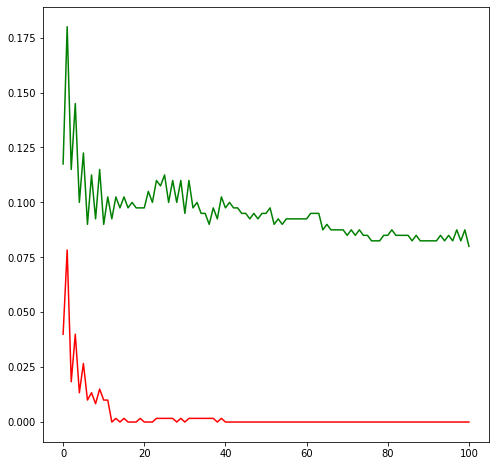

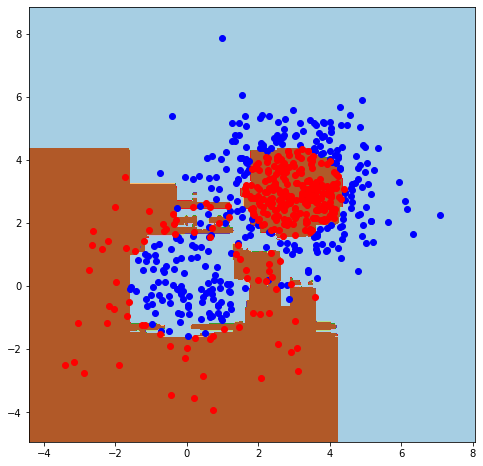

In [13]:
### Display
print("Standard deviation of single tree training error: %g"%np.std(tree_training_error))
print("Standard deviation of single tree generalization error: %g"%np.std(tree_generalization_error))
print("Standard deviation of forest generalization error on last 15 iterations: %g"
      %np.std(forest_generalization_error[-15:]))
print("Average forest generalization error on last 15 iterations: %g"
      %np.mean(forest_generalization_error[-15:]))
print("Last forest generalization error on last 15 iterations: %g"%forest_generalization_error[-1])
plt.figure(figsize=(8,8))
plt.plot(forest_training_error,c='r')
plt.plot(forest_generalization_error,c='g')
plt.figure(figsize=(8,8))
plot_decision_boundary_forest(forest,X,y)